## Are certain shapes sighted more in certain locations?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the clean data file we'll be using for our data source
shapes_data = pd.read_csv("output/clean_data.csv")
shapes_data.head()

,city,state,year,month,day,hour,minute,converted_timestamp,shape
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,light
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,circle
2,Peoria,NY,2009,3,15,18,0,2009-03-15 18:00:00,cigar
3,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,disk
4,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,circle


In [3]:
# Count the number of times each shape was reported in each state
shape_count = shapes_data[["shape", "state"]].value_counts()
shape_count = pd.DataFrame(shape_count)

In [4]:
# Convert the table from above using pivot table to get shape types as column headers
total_count = shape_count.pivot_table(0, "state", "shape").reset_index()
total_count = total_count.fillna(0)
display(total_count.head())

shape,state,changing,chevron,cigar,circle,cone,cross,cylinder,diamond,disk,...,fireball,flash,formation,light,other,oval,rectangle,sphere,teardrop,triangle
0,AK,9.0,1.0,6.0,49.0,1.0,1.0,8.0,8.0,27.0,...,28.0,14.0,12.0,100.0,20.0,17.0,8.0,28.0,1.0,32.0
1,AL,17.0,11.0,27.0,85.0,2.0,4.0,18.0,16.0,35.0,...,64.0,15.0,27.0,200.0,48.0,28.0,16.0,53.0,7.0,87.0
2,AR,11.0,15.0,16.0,77.0,4.0,0.0,14.0,9.0,39.0,...,33.0,19.0,18.0,143.0,39.0,20.0,8.0,31.0,6.0,68.0
3,AZ,104.0,30.0,54.0,312.0,19.0,9.0,36.0,35.0,127.0,...,200.0,60.0,137.0,638.0,224.0,107.0,60.0,190.0,31.0,203.0
4,CA,290.0,127.0,188.0,1027.0,42.0,32.0,146.0,154.0,499.0,...,764.0,187.0,324.0,1965.0,643.0,408.0,175.0,712.0,84.0,770.0


In [5]:
# Make a new dataframe using all columns from total_count except the state column
manipulate = total_count.drop("state", axis=1)

# Find the third most common shape reported in each state
third_max = pd.DataFrame(manipulate.apply(lambda row: row.nlargest(3).idxmin(), axis=1)).reset_index()
third_max = third_max.rename(columns={third_max.columns[0]:"index", third_max.columns[1]:"third_max"})

# Find the second most common shape reported in each state
second_max = pd.DataFrame(manipulate.apply(lambda row: row.nlargest(2).idxmin(), axis=1)).reset_index()
second_max = second_max.rename(columns={second_max.columns[1]:"index", second_max.columns[1]:"second_max"})

# Find the most common shape reported in each state
most_often = manipulate.idxmax(axis=1)
most_often = most_often.reset_index()
most_often = most_often.rename(columns={most_often.columns[0]:"index", most_often.columns[1]:"max"})

In [6]:
# Merge all tables together

# Create index column for merging
total_count = total_count.reset_index()
states = total_count[["index", "state"]]

# Merge total_count and most_often
table_1 = pd.merge(states, most_often, how="left", on="index")

# Merge table_1 with second_max
table_2 = pd.merge(table_1, second_max, how="left", on="index")

# Merge table_2 with third_max to get all data in full_table
shape_stats = pd.merge(table_2, third_max, how="left", on="index")

# Rename columns and drop the extra index column
shape_stats.rename(columns={shape_stats.columns[2]:"max", shape_stats.columns[3]:"second", shape_stats.columns[4]:
                            "third"}, inplace=True)
shape_stats = shape_stats.drop("index", axis=1)

# Save to .csv file for Tableau heatmaps
shape_stats.to_csv("output/shape_stats.csv", index=False)

display(shape_stats.head())

,state,max,second,third
0,AK,light,circle,triangle
1,AL,light,triangle,circle
2,AR,light,circle,triangle
3,AZ,light,circle,other
4,CA,light,circle,triangle


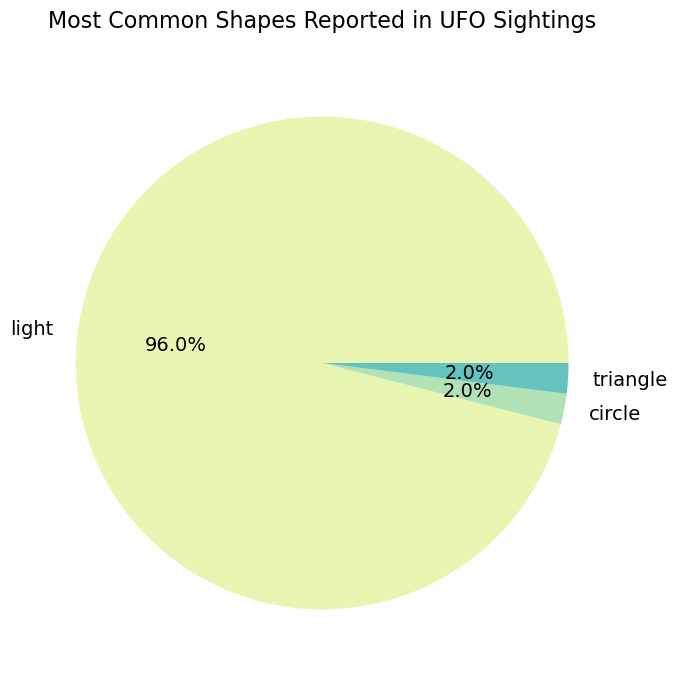

In [7]:
# Create a pie chart of the most common shapes seen in each state and save the visual
values = pd.DataFrame(shape_stats["max"].value_counts()).reset_index()
values = values.rename(columns={values.columns[0]:"max", values.columns[1]:"count"})

plt.figure(figsize=(8,8))
plt.pie(values["count"], labels=values["max"], autopct="%.1f%%", textprops={"fontsize": 14}, colors=sns.color_palette("YlGnBu"))
plt.title(label="Most Common Shapes Reported in UFO Sightings", fontdict={"fontsize":16}, pad=20)
plt.savefig("visuals/most_common_shape.png")
plt.show()

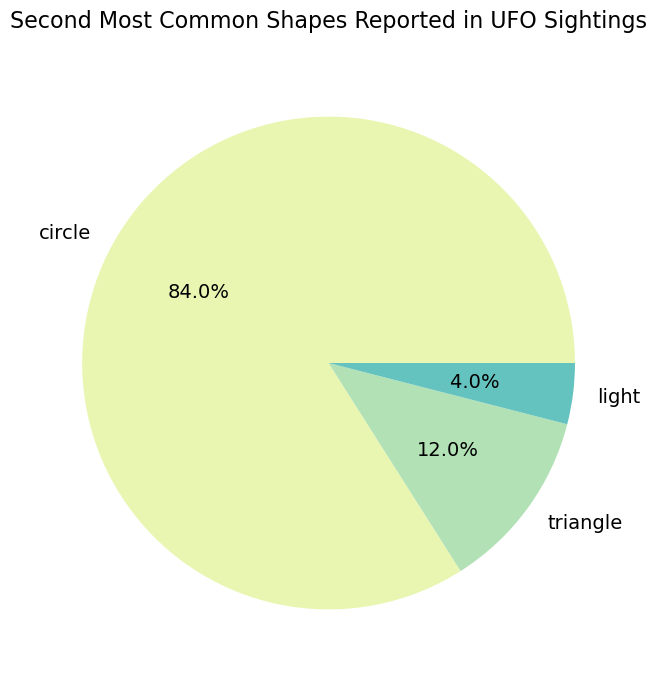

In [8]:
# Create a pie chart of the second most common shapes seen in each state and save the visual
values = pd.DataFrame(shape_stats["second"].value_counts()).reset_index()
values = values.rename(columns={values.columns[0]:"second", values.columns[1]:"count"})

plt.figure(figsize=(8,8))
plt.pie(values["count"], labels=values["second"], autopct="%.1f%%", textprops={"fontsize": 14},
        colors=sns.color_palette("YlGnBu"))
plt.title(label="Second Most Common Shapes Reported in UFO Sightings", fontdict={"fontsize":16}, pad=20)
plt.savefig("visuals/second_common_shape.png")
plt.show()

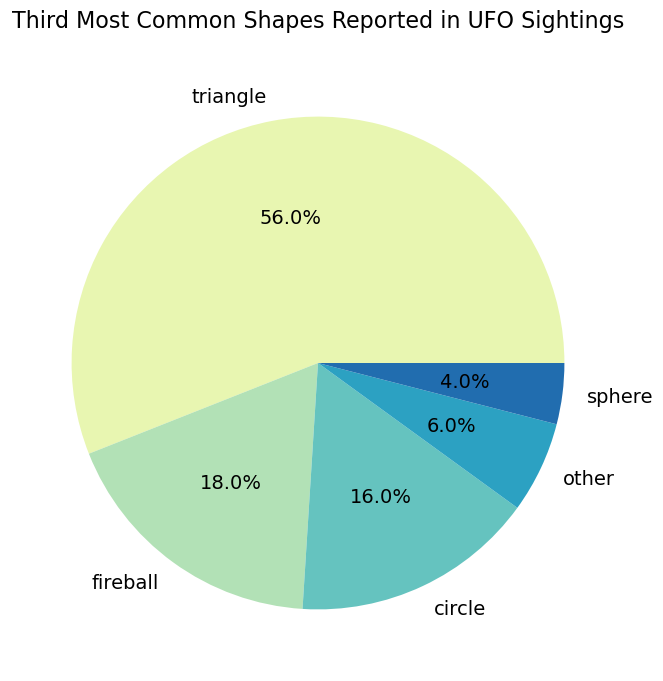

In [9]:
# Create a pie chart of the third most common shapes seen in each state and save the visual
values = pd.DataFrame(shape_stats["third"].value_counts()).reset_index()
values = values.rename(columns={values.columns[0]:"third", values.columns[1]:"count"})

plt.figure(figsize=(8,8))
plt.pie(values["count"], labels=values["third"], autopct="%.1f%%", textprops={"fontsize": 14},
        colors=sns.color_palette("YlGnBu"))
plt.title(label="Third Most Common Shapes Reported in UFO Sightings", fontdict={"fontsize":16}, pad=20)
plt.savefig("visuals/third_common_shape.png")
plt.show()